In [1]:
import pandas as pd
import numpy as np
import featuretools as ft
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
col_names = ['unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2',
             'operational_setting_3', 'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3',
             'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_7',
             'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_10', 'sensor_measurement_11',
             'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15',
             'sensor_measurement_16', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19',
             'sensor_measurement_20', 'sensor_measurement_21', 'col_27', 'col_28']

In [3]:
# Read in raw data from FD001 train and test sets

train_FD001 = pd.read_csv('CMAPSSData/train_FD001.txt', sep=" ", header=None)
train_FD001.columns = col_names

test_FD001 = pd.read_csv('CMAPSSData/test_FD001.txt', sep=" ", header=None)
test_FD001.columns = col_names

# Confirm equal number of unique engines in train and test sets

print(len(train_FD001['unit_number'].unique()))
print(len(test_FD001['unit_number'].unique()))

100
100


In [4]:
# Concatenate train data sets to create a full train_df

train_df = train_FD001.copy()
# train_df = train_df.reset_index(drop=True)
print(train_df.shape)
train_df.head()

(20631, 28)


,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,col_27,col_28
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [5]:
# Concatenate test data sets to create a full test_df

test_df = test_FD001.copy()
# test_df = test_df.reset_index(drop=True)
print(test_df.shape)
test_df.head()

(13096, 28)


,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,col_27,col_28
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [6]:
# Finding NaN values

NaN_values = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1)
NaN_values.columns = ['train', 'test']
NaN_values

,train,test
unit_number,0,0
time_in_cycles,0,0
operational_setting_1,0,0
operational_setting_2,0,0
operational_setting_3,0,0
sensor_measurement_1,0,0
sensor_measurement_2,0,0
sensor_measurement_3,0,0
sensor_measurement_4,0,0
sensor_measurement_5,0,0


In [7]:
# Drop the final two columns in the train_df and test_df

train_df = train_df.drop(train_df.columns[[-1,-2]], axis=1)
test_df = test_df.drop(test_df.columns[[-1,-2]], axis=1)

In [8]:
# Read in raw data from FD001 RUL data set

RUL_FD001 = pd.read_csv('CMAPSSData/RUL_FD001.txt', sep=" ", header=None)
RUL_FD001 = pd.DataFrame(RUL_FD001[0]) # Drop second column consisting of NaN values
len(RUL_FD001) # Confirm number of units match with those from the corresponding train and test sets

100

In [9]:
# Create a new column from the index representing unit number

RUL_FD001['unit_number'] = RUL_FD001.index + 1
RUL_FD001.columns = ['RUL_in_number_of_cycles', 'unit_number']

# Reorder columns

cols = RUL_FD001.columns.tolist()
cols = cols[-1:] + cols[:-1]
RUL_FD001 = RUL_FD001[cols]

In [10]:
# Concatenate RUL data sets to create a full RUL_df

RUL_df = RUL_FD001.copy()
# RUL_df = RUL_df.reset_index(drop=True)
print(RUL_df.shape)
RUL_df.tail()

(100, 2)


,unit_number,RUL_in_number_of_cycles
95,96,137
96,97,82
97,98,59
98,99,117
99,100,20


In [11]:
# Now that we have our dataframes organized let's see what the data looks like

train_df.describe().transpose().round(3)

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.507,29.228,1.000,26.000,52.000,77.000,100.000
time_in_cycles,20631.0,108.808,68.881,1.000,52.000,104.000,156.000,362.000
operational_setting_1,20631.0,-0.000,0.002,-0.009,-0.002,0.000,0.002,0.009
operational_setting_2,20631.0,0.000,0.000,-0.001,-0.000,0.000,0.000,0.001
operational_setting_3,20631.0,100.000,0.000,100.000,100.000,100.000,100.000,100.000
sensor_measurement_1,20631.0,518.670,0.000,518.670,518.670,518.670,518.670,518.670
sensor_measurement_2,20631.0,642.681,0.500,641.210,642.325,642.640,643.000,644.530
sensor_measurement_3,20631.0,1590.523,6.131,1571.040,1586.260,1590.100,1594.380,1616.910
sensor_measurement_4,20631.0,1408.934,9.001,1382.250,1402.360,1408.040,1414.555,1441.490
sensor_measurement_5,20631.0,14.620,0.000,14.620,14.620,14.620,14.620,14.620


In [12]:
# Remove sensors with identical min and max values - i.e. flat line (no activity with potential sensor malfunctioning)

train_df = train_df.drop(['operational_setting_3', 'sensor_measurement_1', 'sensor_measurement_5', 
            'sensor_measurement_6', 'sensor_measurement_10', 'sensor_measurement_16', 'sensor_measurement_18', 
                          'sensor_measurement_19'], axis=1)
test_df = test_df.drop(['operational_setting_3', 'sensor_measurement_1', 'sensor_measurement_5', 
            'sensor_measurement_6', 'sensor_measurement_10', 'sensor_measurement_16', 'sensor_measurement_18', 
                          'sensor_measurement_19'], axis=1)

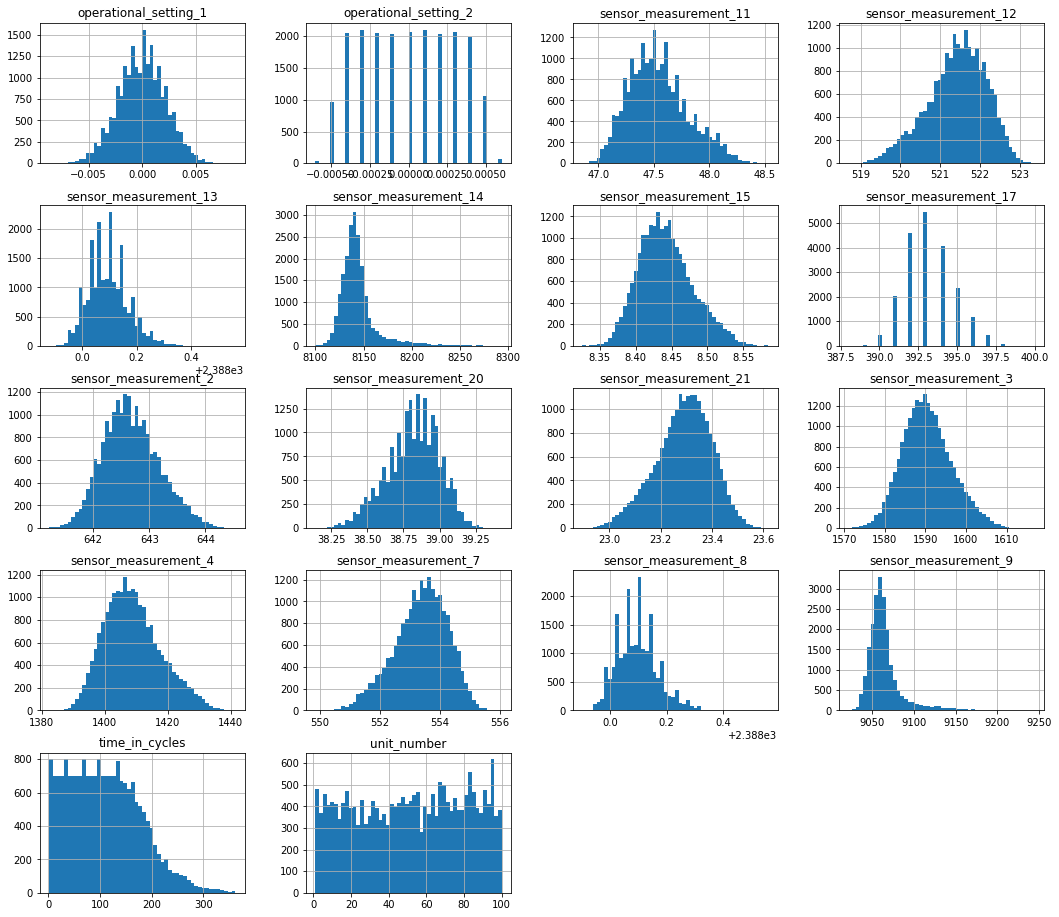

In [13]:
train_df.hist(bins=50, figsize=(18,16))
plt.show()

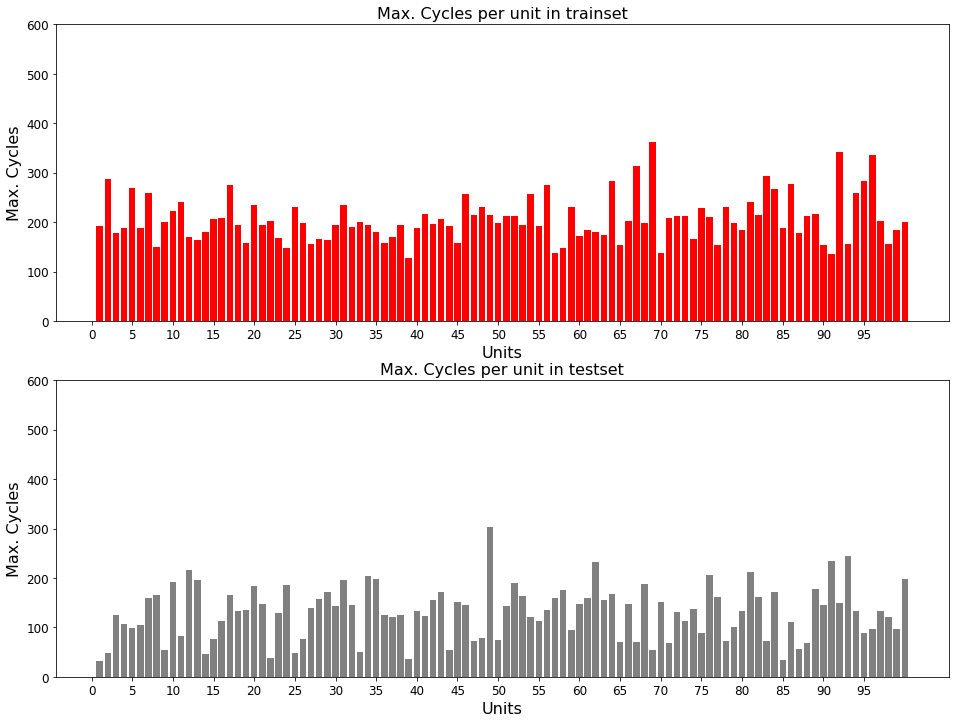

In [14]:
# Let's visualize the maximium number of cycles per unit in the train and test sets

cyclestrain = train_df.groupby('unit_number', as_index=False)['time_in_cycles'].max()
cyclestest = test_df.groupby('unit_number', as_index=False)['time_in_cycles'].max()

fig = plt.figure(figsize = (16,12))
fig.add_subplot(2, 1, 1)
bar_labels = list(cyclestrain['unit_number'])
bars = plt.bar(list(cyclestrain['unit_number']), cyclestrain['time_in_cycles'], color='red')
plt.ylim([0, 600])
plt.xlabel('Units', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in trainset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)

fig.add_subplot(2, 1, 2)
bars = plt.bar(list(cyclestest['unit_number']), cyclestest['time_in_cycles'], color='grey')
plt.ylim([0, 600])
plt.xlabel('Units', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in testset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

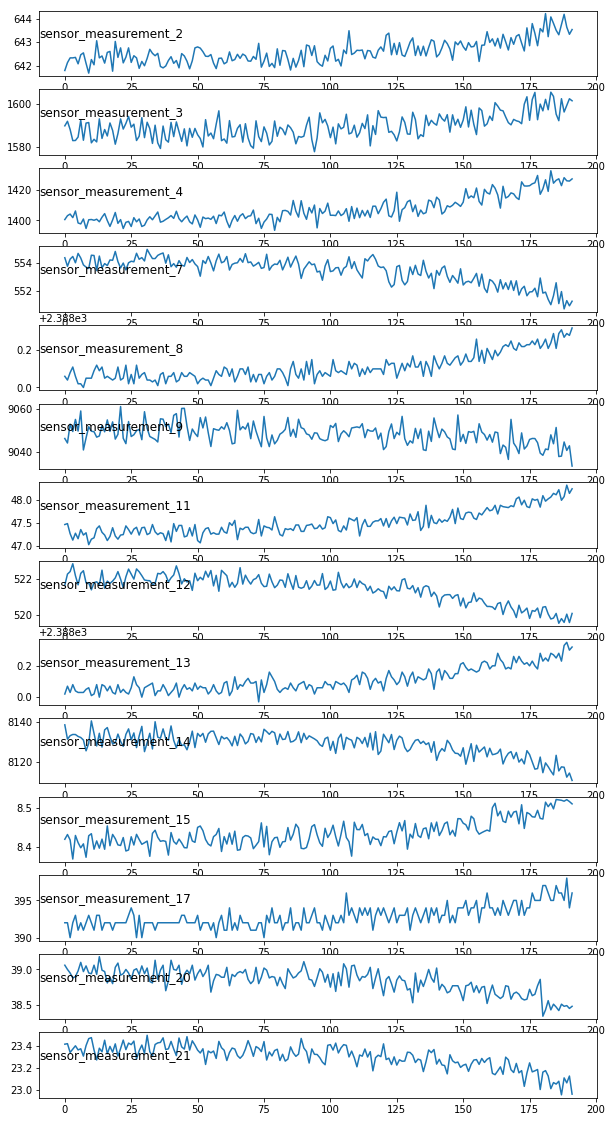

In [15]:
# Let's visualize different sensor metrics within the first engine unit of the train set

values = train_df[train_df.unit_number==1].values
sensors = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
i = 1
plt.figure(figsize=(10,20))

for sensor in sensors:
    plt.subplot(len(sensors), 1, i)
    plt.plot(values[:, sensor])
    plt.title(train_df.columns[sensor], y=0.5, loc='left')
    i += 1
    
plt.show()

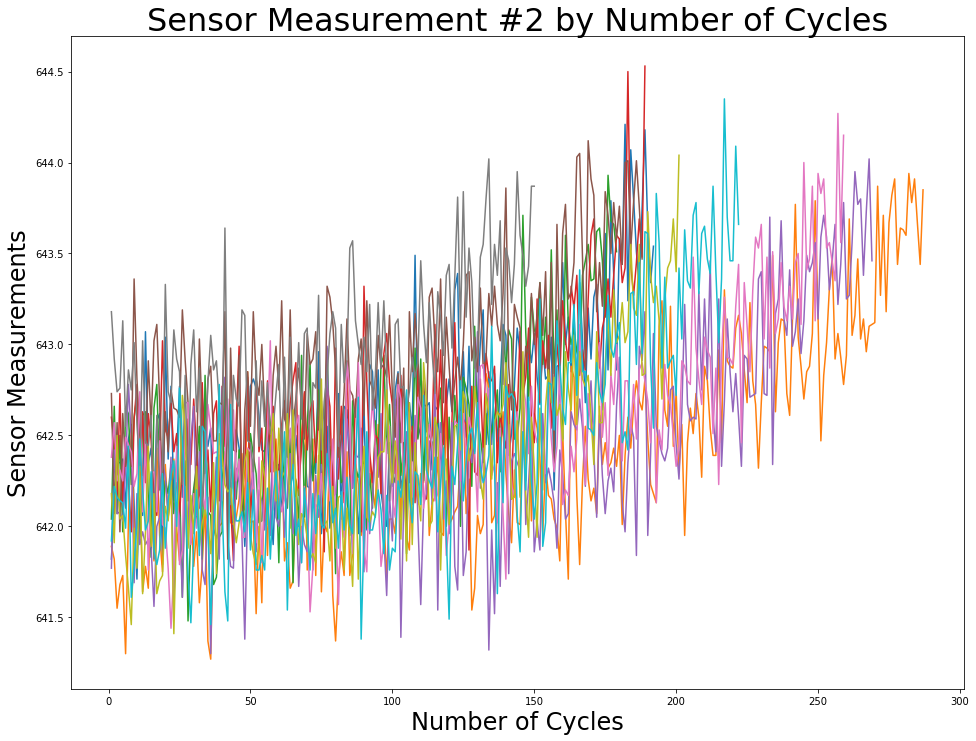

In [16]:
# Visualize sensor measurements across the first 10 engine units

plt.figure(figsize = (16, 12))
plt.plot(train_df[train_df.unit_number==1].time_in_cycles, train_df[train_df.unit_number==1].sensor_measurement_2)
plt.plot(train_df[train_df.unit_number==2].time_in_cycles, train_df[train_df.unit_number==2].sensor_measurement_2)
plt.plot(train_df[train_df.unit_number==3].time_in_cycles, train_df[train_df.unit_number==3].sensor_measurement_2)
plt.plot(train_df[train_df.unit_number==4].time_in_cycles, train_df[train_df.unit_number==4].sensor_measurement_2)
plt.plot(train_df[train_df.unit_number==5].time_in_cycles, train_df[train_df.unit_number==5].sensor_measurement_2)
plt.plot(train_df[train_df.unit_number==6].time_in_cycles, train_df[train_df.unit_number==6].sensor_measurement_2)
plt.plot(train_df[train_df.unit_number==7].time_in_cycles, train_df[train_df.unit_number==7].sensor_measurement_2)
plt.plot(train_df[train_df.unit_number==8].time_in_cycles, train_df[train_df.unit_number==8].sensor_measurement_2)
plt.plot(train_df[train_df.unit_number==9].time_in_cycles, train_df[train_df.unit_number==9].sensor_measurement_2)
plt.plot(train_df[train_df.unit_number==10].time_in_cycles, train_df[train_df.unit_number==10].sensor_measurement_2)
plt.title('Sensor Measurement #2 by Number of Cycles', size=32)
plt.xlabel('Number of Cycles', size=24)
plt.ylabel('Sensor Measurements', size=24)
plt.show()

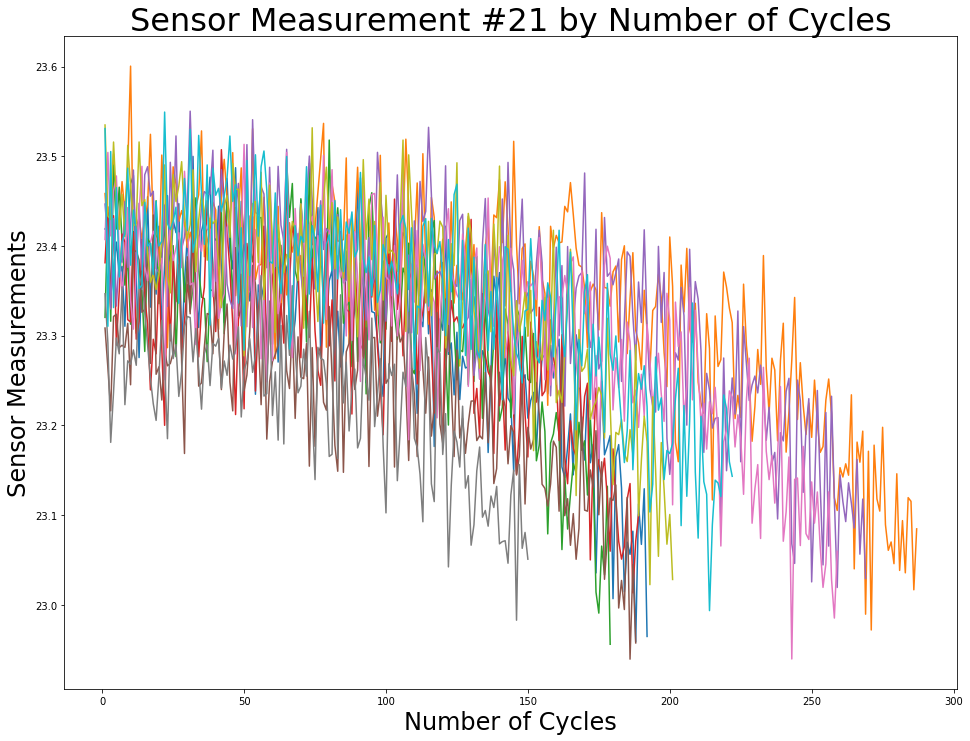

In [17]:
# Visualize sensor measurements across the first 10 engine units

plt.figure(figsize = (16, 12))
plt.plot(train_df[train_df.unit_number==1].time_in_cycles, train_df[train_df.unit_number==1].sensor_measurement_21)
plt.plot(train_df[train_df.unit_number==2].time_in_cycles, train_df[train_df.unit_number==2].sensor_measurement_21)
plt.plot(train_df[train_df.unit_number==3].time_in_cycles, train_df[train_df.unit_number==3].sensor_measurement_21)
plt.plot(train_df[train_df.unit_number==4].time_in_cycles, train_df[train_df.unit_number==4].sensor_measurement_21)
plt.plot(train_df[train_df.unit_number==5].time_in_cycles, train_df[train_df.unit_number==5].sensor_measurement_21)
plt.plot(train_df[train_df.unit_number==6].time_in_cycles, train_df[train_df.unit_number==6].sensor_measurement_21)
plt.plot(train_df[train_df.unit_number==7].time_in_cycles, train_df[train_df.unit_number==7].sensor_measurement_21)
plt.plot(train_df[train_df.unit_number==8].time_in_cycles, train_df[train_df.unit_number==8].sensor_measurement_21)
plt.plot(train_df[train_df.unit_number==9].time_in_cycles, train_df[train_df.unit_number==9].sensor_measurement_21)
plt.plot(train_df[train_df.unit_number==10].time_in_cycles, train_df[train_df.unit_number==10].sensor_measurement_21)
plt.title('Sensor Measurement #21 by Number of Cycles', size=32)
plt.xlabel('Number of Cycles', size=24)
plt.ylabel('Sensor Measurements', size=24)
plt.show()

In [18]:
# Groupby every unit the maximum number of cycles, merge values into train set:

train = pd.merge(train_df, train_df.groupby('unit_number', as_index=False)['time_in_cycles'].max(), 
                 how='left', on='unit_number')
train = train.rename(columns={"time_in_cycles_x": "cycles", "time_in_cycles_y": "maxcycles"})

# Determine RUL for every row (time_in_cycles subtracted from the maxcycles for a particular engine unit)

train['RUL'] = train['maxcycles'] - train['cycles']

In [19]:
# Make a copy of the data before scaling and describe the unscaled data

ntrain = train.copy()
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,29.227633,1.0000,26.0000,52.0000,77.0000,100.0000
cycles,20631.0,108.807862,68.880990,1.0000,52.0000,104.0000,156.0000,362.0000
operational_setting_1,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0000,0.0015,0.0087
operational_setting_2,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0000,0.0003,0.0006
sensor_measurement_2,20631.0,642.680934,0.500053,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_measurement_3,20631.0,1590.523119,6.131150,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_measurement_4,20631.0,1408.933782,9.000605,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_measurement_7,20631.0,553.367711,0.885092,549.8500,552.8100,553.4400,554.0100,556.0600
sensor_measurement_8,20631.0,2388.096652,0.070985,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
sensor_measurement_9,20631.0,9065.242941,22.082880,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900


In [20]:
# Scale using StandardScalar and describe the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ntrain.iloc[:,2:18] = scaler.fit_transform(ntrain.iloc[:,2:18])
ntrain.describe().transpose()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,5.150657e+01,29.227633,1.000000,26.000000,52.000000,77.000000,100.000000
cycles,20631.0,1.088079e+02,68.880990,1.000000,52.000000,104.000000,156.000000,362.000000
operational_setting_1,20631.0,-9.880129e-18,1.000024,-3.973523,-0.681734,0.004055,0.689845,3.981634
operational_setting_2,20631.0,6.097267e-16,1.000024,-2.055419,-0.690488,-0.008022,1.015677,2.039375
sensor_measurement_2,20631.0,6.258537e-14,1.000024,-2.941625,-0.711809,-0.081860,0.638080,3.697829
sensor_measurement_3,20631.0,-4.962530e-14,1.000024,-3.177804,-0.695338,-0.069013,0.629079,4.303846
sensor_measurement_4,20631.0,8.308134e-16,1.000024,-2.964737,-0.730389,-0.099305,0.624553,3.617202
sensor_measurement_7,20631.0,-3.149990e-14,1.000024,-3.974497,-0.630132,0.081676,0.725692,3.041891
sensor_measurement_8,20631.0,1.008424e-12,1.000024,-2.770375,-0.657216,-0.093707,0.610680,6.527526
sensor_measurement_9,20631.0,-4.172343e-14,1.000024,-1.970486,-0.549894,-0.207539,0.189158,8.121740


In [21]:
train.shape

(20631, 20)

In [22]:
test_df.shape

(13096, 18)

In [23]:
# Repeat scaling for the test data

ntest = test_df.copy()
ntest.iloc[:,2:] = scaler.transform(ntest.iloc[:,2:])
ntest.describe().transpose()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,count,mean,std,min,25%,50%,75%,max
unit_number,13096.0,51.543907,28.289423,1.000000,28.000000,52.000000,76.000000,100.000000
time_in_cycles,13096.0,76.836515,53.057749,1.000000,33.000000,69.000000,113.000000,303.000000
operational_setting_1,13096.0,-0.001056,1.007052,-3.744927,-0.681734,0.004055,0.689845,3.570160
operational_setting_2,13096.0,0.006439,1.003329,-2.055419,-0.690488,-0.008022,1.015677,2.380608
sensor_measurement_2,13096.0,-0.411658,0.801733,-3.101612,-0.966788,-0.441831,0.118123,3.237866
sensor_measurement_3,13096.0,-0.395354,0.816062,-3.504015,-0.966093,-0.413166,0.136908,2.777178
sensor_measurement_4,13096.0,-0.466471,0.743114,-2.726970,-0.998155,-0.499288,0.012913,2.713908
sensor_measurement_7,13096.0,0.440430,0.769753,-2.810748,-0.065205,0.488423,0.985558,2.793323
sensor_measurement_8,13096.0,-0.361875,0.809224,-2.911252,-0.938970,-0.375461,0.188048,2.864717
sensor_measurement_9,13096.0,-0.309549,0.517892,-1.843687,-0.644087,-0.358791,-0.051305,4.066011


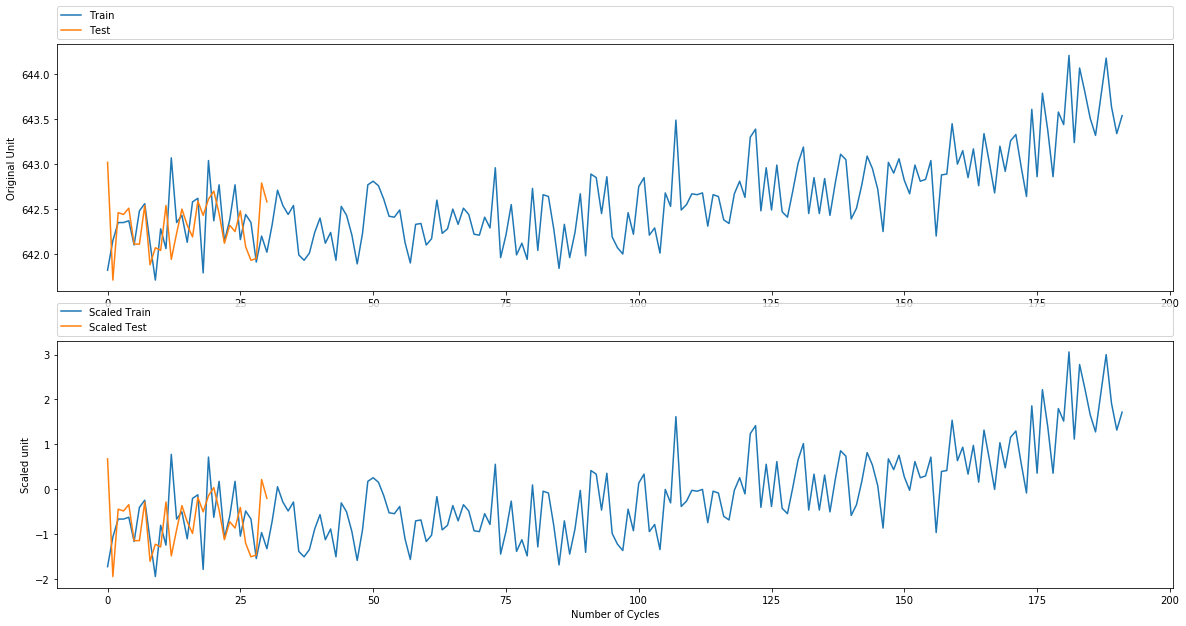

In [24]:
# Visualize the scaled data

fig = plt.figure(figsize = (20, 10))
fig.add_subplot(2,1,1)
plt.plot(train[train.unit_number==1].sensor_measurement_2)
plt.plot(test_df[test_df.unit_number==1].sensor_measurement_2)
plt.legend(['Train','Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original Unit')
fig.add_subplot(2,1,2)
plt.plot(ntrain[ntrain.unit_number==1].sensor_measurement_2)
plt.plot(ntest[ntest.unit_number==1].sensor_measurement_2)
plt.legend(['Scaled Train','Scaled Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled unit')
plt.xlabel('Number of Cycles')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

regression_models = {
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Support Vector Regression': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42), 
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
}

In [26]:
hyperparameter_grid = {
    'K-Nearest Neighbors Regressor': {'n_neighbors': [num for num in list(range(1,21))]},
    'Support Vector Regression': {'kernel':['rbf', 'poly'], 'C': list(range(1,10)), 
                                  'gamma': list(np.linspace(0.01,0.1,10))}, 
    'Decision Tree Regressor': {'max_depth': list(range(1,5))},
    'Random Forest Regressor': {'max_depth': list(range(1,5)), 'n_estimators': list(range(1,100))}, 
    'Gradient Boosting Regressor': {'learning_rate':list(np.linspace(0.01,0.1,10)), 'max_depth':list(range(1,5))}
}

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
mse_score = mean_squared_error

def hyperparameter_grid_search(X, y, models, hyperparameter_grid, scoring):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    best_list = []
    
    for model, params in list(zip(models.values(), hyperparameter_grid.values())):
        rand = RandomizedSearchCV(model, params, cv=5, scoring=scoring, random_state=42)
        rand.fit(X_train_scaled, y_train)
        best_list.append([model, rand.best_params_,  rand.best_score_])
        
    return best_list

In [28]:
X = train_df.drop(columns=['unit_number'], axis=1)
y = train['RUL']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 17 columns):
time_in_cycles           20631 non-null int64
operational_setting_1    20631 non-null float64
operational_setting_2    20631 non-null float64
sensor_measurement_2     20631 non-null float64
sensor_measurement_3     20631 non-null float64
sensor_measurement_4     20631 non-null float64
sensor_measurement_7     20631 non-null float64
sensor_measurement_8     20631 non-null float64
sensor_measurement_9     20631 non-null float64
sensor_measurement_11    20631 non-null float64
sensor_measurement_12    20631 non-null float64
sensor_measurement_13    20631 non-null float64
sensor_measurement_14    20631 non-null float64
sensor_measurement_15    20631 non-null float64
sensor_measurement_17    20631 non-null int64
sensor_measurement_20    20631 non-null float64
sensor_measurement_21    20631 non-null float64
dtypes: float64(15), int64(2)
memory usage: 2.7 MB


In [29]:
hyperparameter_grid_search(X, y, regression_models, hyperparameter_grid, scoring='neg_mean_squared_error')

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


[[KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=5, p=2,
            weights='uniform'), {'n_neighbors': 19}, -1433.5130545033653],
 [SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False),
  {'kernel': 'rbf', 'gamma': 0.05000000000000001, 'C': 4},
  -1418.5275432406859],
 [DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=42, splitter='best'),
  {'max_depth': 4},
  -1531.9520811514008],
 [RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min

In [30]:
tuned_regression_models = {
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Regression': SVR(kernel='rbf', C=8, 
                                  gamma=0.06000000000000001), 
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=4),
    'Random Forest Regressor': RandomForestRegressor(max_depth=4, n_estimators=91), 
    'Gradient Boosting Regressor': GradientBoostingRegressor(learning_rate=0.08, max_depth=4)
}

In [31]:
# Create function to evaluate cross validated model scores

from sklearn.model_selection import cross_val_score

def model_cross_validation(X, y, models, scoring):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    results_list = []
    
    for model in models.values():
        cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=scoring)
        results_list.append((model, cv_score.mean()))
        
    return results_list

In [32]:
model_cross_validation(X, y, tuned_regression_models, scoring='neg_mean_squared_error')

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


[(KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=5, p=2,
            weights='uniform'), -1637.8345268118935),
 (SVR(C=8, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.06000000000000001, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False), -1395.3584915432948),
 (DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
  -1531.9527020458638),
 (RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fracti

In [33]:
train.head()

,unit_number,cycles,operational_setting_1,operational_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,maxcycles,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,192,187


In [34]:
# Let's see predictions from our optimized Gradient Boosting Regressor model

# Split into train and test matrices

X_train = train_df.values[:,1:18]
y_train = train.values[:,19]
X_test = test_df.values[:,1:18]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gbr = GradientBoostingRegressor(learning_rate=0.08, max_depth = 4, random_state=42)
gbr = gbr.fit(X_train_scaled, y_train)
gbr_pred = gbr.predict(X_test_scaled)

score = gbr.predict(X_test_scaled)
print(score.min(), score.max())

5.969007391026249 260.01676082225146


In [35]:
test_df.head() # Reminder that this data is not scaled!

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130


In [36]:
test = pd.merge(test_df, test_df.groupby('unit_number', as_index=False)['time_in_cycles'].max(), how='left', 
                   on='unit_number')
test.rename(columns={"time_in_cycles_x": "cycles", "time_in_cycles_y": "maxcycles"}, inplace=True)

test['RUL'] = score
test['RUL'].head()

0    207.350819
1    214.065048
2    202.551344
3    206.470705
4    213.105647
Name: RUL, dtype: float64

In [37]:
t = test.columns == 'RUL'
ind = [i for i, x in enumerate(t) if x]

predictedRUL = []

for i in range(test.unit_number.min(), test.unit_number.max()+1):
    npredictedRUL=test[test.unit_number==i].iloc[test[test.unit_number==i].cycles.max()-1,ind]
    predictedRUL.append(npredictedRUL)

print(len(predictedRUL))
predictedRUL[0:10]

100


[RUL    181.551025
 Name: 30, dtype: float64, RUL    145.505206
 Name: 79, dtype: float64, RUL    53.85276
 Name: 205, dtype: float64, RUL    84.328652
 Name: 311, dtype: float64, RUL    98.225524
 Name: 409, dtype: float64, RUL    102.675071
 Name: 514, dtype: float64, RUL    103.193544
 Name: 674, dtype: float64, RUL    76.695744
 Name: 840, dtype: float64, RUL    138.175179
 Name: 895, dtype: float64, RUL    102.403554
 Name: 1087, dtype: float64]

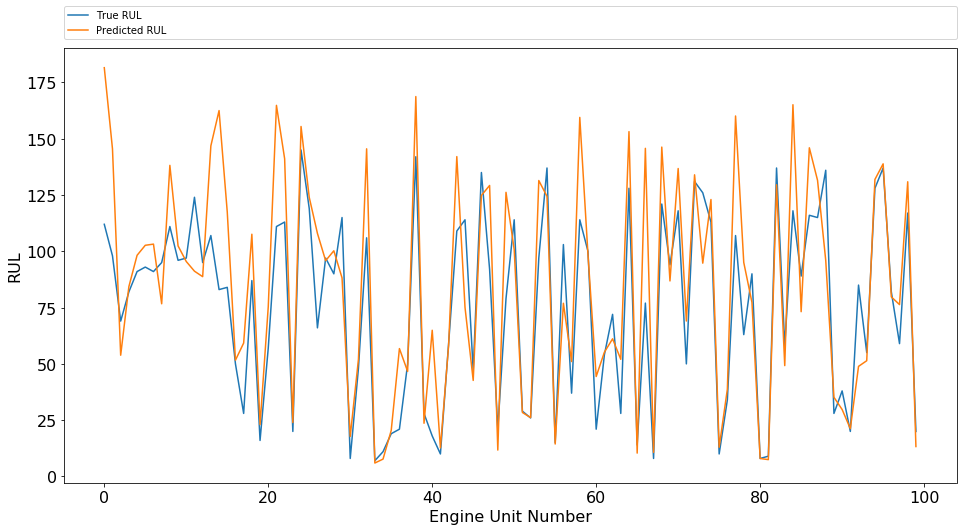

In [38]:
plt.figure(figsize = (16, 8))
plt.plot(RUL_df.iloc[0:100,1])
plt.plot(predictedRUL[0:100])
plt.xlabel('Engine Unit Number', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('RUL', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['True RUL','Predicted RUL'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

In [39]:
# Calculate MSE and RMSE

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(RUL_df.iloc[:,1], predictedRUL)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

644.4287135312259
25.385600515473843


In [40]:
# Determine Whether RUL is within 20 cycles for every row (RUL <= 20)

train_RUL_class = []

for i in train['RUL']:
    if i <= 20:
        train_RUL_class.append(1)
    else:
        train_RUL_class.append(0)
        
train['20_cycles_to_failure'] = train_RUL_class
train['20_cycles_to_failure'].value_counts()

0    18531
1     2100
Name: 20_cycles_to_failure, dtype: int64

In [41]:
train.head()

,unit_number,cycles,operational_setting_1,operational_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,maxcycles,RUL,20_cycles_to_failure
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,...,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192,191,0
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,...,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,192,190,0
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,...,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,192,189,0
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,...,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,192,188,0
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,...,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,192,187,0


In [42]:
import pickle

# Save data frame as pickle

pickle_out = open("train.pickle", "wb") # write file to bytes
pickle.dump(train, pickle_out)
pickle_out.close()

pickle_out = open("test.pickle", "wb") # write file to bytes
pickle.dump(test_df, pickle_out)
pickle_out.close()

In [43]:
# Repeat for the RUL_df

RUL_df_class = []

for i in RUL_df['RUL_in_number_of_cycles']:
    if i <= 20:
        RUL_df_class.append(1)
    else:
        RUL_df_class.append(0)
        
RUL_df['20_cycles_to_failure'] = RUL_df_class
RUL_df['20_cycles_to_failure'].value_counts()

0    84
1    16
Name: 20_cycles_to_failure, dtype: int64

In [44]:
# Save RUL_df_class as pickle

pickle_out = open("RUL_df.pickle", "wb") # write file to bytes
pickle.dump(RUL_df, pickle_out)
pickle_out.close()